In [1]:
! pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 85 kB 2.4 MB/s 
     |████████████████████████████████| 4.4 MB 46.2 MB/s 
     |████████████████████████████████| 1.2 MB 48.6 MB/s 
     |████████████████████████████████| 101 kB 12.8 MB/s 
     |████████████████████████████████| 596 kB 46.0 MB/s 
     |████████████████████████████████| 6.6 MB 19.1 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=88d26ad196aa467daba2b1ffc749283a66bf72d8e706d579fa35eaf90bd2a353
  Stored in directory: /root/.cache/pip/wheels/bf/06/fb/d59c1e5bd1dac7f6cf61ec0036cc3a10ab8fecaa6b2c3d3ee9
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [2]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.4k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

In [3]:
import csv

with open('persica.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)



In [4]:
len(data)

1002

In [5]:
data1 = []
for i in range(len(data)):
  data1.append(data[i][0])

data1 = data1[1:]

In [6]:
data1[1]

'گردهمايي دانش\u200cآموختگان موسسه آموزش عالي سوره برگزار مي\u200cشود'

In [7]:
embeddings = model.encode(data1 ,  batch_size=64, show_progress_bar=True, convert_to_tensor=True)

Batches:   0%|          | 0/16 [00:00<?, ?it/s]

In [8]:
embeddings.shape

torch.Size([1001, 384])

# clustering method 1 : 

In [9]:
import time
from sentence_transformers import SentenceTransformer, util



print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters_method1 = util.community_detection(embeddings, min_community_size=25, threshold=0.75)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters_method1):
    print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    for sentence_id in cluster[0:3]:
        print("\t", data1[sentence_id])
    print("\t", "...")
    for sentence_id in cluster[-3:]:
        print("\t", data1[sentence_id])

Start clustering
Clustering done after 4.44 sec

Cluster 1, #800 Elements 
	 وزير علوم درجمع استادان نمونه: سن بازنشستگي استادان نمونه به 70 سال افزايش مي‌يابد دانشگاه بايد مهد چالشهاي گفتماني و خط دهنده و برنامه‌ريز جريانات سياسي باشد
	 گردهمايي دانش‌آموختگان موسسه آموزش عالي سوره برگزار مي‌شود
	 نتايج آزمون دوره‌هاي فراگير دانشگاه پيام‌نور اعلام شد
	 ...
	 مدير كل امور بورس و دانشجويان خارج وزارت علوم: دكتر فرجي دانا با استفاده از بورس دانشجويان ممتاز و رتبه اول، بورسيه شده‌اند
	 نماينده تام الاختيار دانشگاه علوم پزشكي تهران در منطقه آزاد كيش منصوب شد
	 معاون آموزشي دانشگاه گيلان: دانشگاهها به جاي سعي بر حفظ دانشجويان ضعيف و اخراجي، بايد از دانشجويان كيفي حمايت كنند

Cluster 2, #46 Elements 
	 شرايط و جزييات آزمون دستياري اعلام شد معاون آموزشي وزارت بهداشت در گفت‌وگو با ايسنا خبرداد: ايجاد دوره‌هاي دستياري حين خدمت و افزايش ظرفيت پذيرش
	 استاندار خراسان رضوي از آمادگي ايران جهت ايجاد دانشگاه در افغانستان خبر داد
	 رييس انجمن صنفي كنكور از اجراي پروژه تدوين استانداردهاي خدمات كمك آموز

In [10]:
len(clusters_method1)

5

# clustering method 2 : 

In [33]:
from sklearn.cluster import DBSCAN

clustering = DBSCAN(eps=0.35, min_samples=10).fit(embeddings)

clusters_method2 = clustering.labels_

In [34]:
# for i in clusters_method2:
#   print(i)

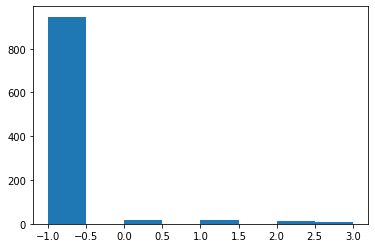

In [35]:
import matplotlib.pyplot as plt

plt.hist(clusters_method2, bins = 8)
plt.show()

# topic extraction (clustering 1) :

In [36]:
cluster_sentences = []
for i in range(len(clusters_method1)):
  cluster_sentences.append([])
  for j in range(len(clusters_method1[i])):
    sentence_index = clusters_method1[i][j]
    cluster_sentences[i].append(data1[sentence_index])



In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 
import pandas as pd

tfidf_of_clusters = []

for i in range(len(cluster_sentences)):
  vectorizer = TfidfVectorizer() 
  X = vectorizer.fit_transform(cluster_sentences[i]) 
  tfidf_of_clusters.append(pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())) 

In [38]:
topics = []
for i in range(len(tfidf_of_clusters)):
  tmp = tfidf_of_clusters[i].max().to_frame()
  tmp = tmp.set_axis(['P'], axis=1, inplace=False)
  tmp = tmp.sort_values(by=['P'] , ascending=False)[:5].index
  tmp = " ".join(str(x) for x in tmp)
  topics.append(tmp)

In [39]:
for i in range(len(topics)):
  print("topic of cluster", i , "is : " , topics[i])

topic of cluster 0 is :  نجوم دانشکده گاز مكزيك نمايشگاهي
topic of cluster 1 is :  امام پرستار خبرگزاري برنامه روز
topic of cluster 2 is :  زندانيان كارشناسي گروه زيست جنگ
topic of cluster 3 is :  دريايي نمايشگاه دانشكده سوريه شارون
topic of cluster 4 is :  لرزيد دماوند بار ديگر چهره


# topic extraction (clustering 2) :

In [41]:
cluster_sentences2 = [[],[],[],[],[]]
for i in range(len(clusters_method2)):
  cluster_sentences2[clusters_method2[i]+1].append(data1[i])


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 
import pandas as pd

tfidf_of_clusters2 = []

for i in range(len(cluster_sentences2)):
  vectorizer = TfidfVectorizer() 
  X = vectorizer.fit_transform(cluster_sentences2[i]) 
  tfidf_of_clusters2.append(pd.DataFrame(np.round(X.A,3), columns=vectorizer.get_feature_names_out())) 

In [43]:
topics2 = []
for i in range(len(tfidf_of_clusters2)):
  tmp = tfidf_of_clusters2[i].max().to_frame()
  tmp = tmp.set_axis(['P'], axis=1, inplace=False)
  tmp = tmp.sort_values(by=['P'] , ascending=False)[:5].index
  tmp = " ".join(str(x) for x in tmp)
  topics2.append(tmp)

In [44]:
for i in range(len(topics)):
  print("topic of cluster", i , "is : " , topics2[i])

topic of cluster 0 is :  اصلاحيه نجوم زيباشناسي گاز دريايي
topic of cluster 1 is :  دانشگاهها گروه پاتولوژي كانون ادبي
topic of cluster 2 is :  كشاورزي پزشكي هاي پيوسته فردا
topic of cluster 3 is :  مكزيك دوره دانشكده پزشكي اخلاق
topic of cluster 4 is :  كشور كانادا افتخارآفريني كردند با
